Time series data is an important form of structured data in many different fields, such
as finance, economics, ecology, neuroscience, and physics. Anything that is observed
or measured at many points in time forms a time series. Many time series are fixed
frequency, which is to say that data points occur at regular intervals according to some
rule, such as every 15 seconds, every 5 minutes, or once per month. Time series can
also be irregular without a fixed unit of time or offset between units.`

How you mark and refer to time series data depends on the application, and you may have one of the following:
1. Timestamps, specific instants in time
2. Fixed periods, such as the month January 2007 or the full year 2010
3. Intervals of time, indicated by a start and end timestamp. Periods can be thought of as special cases of intervals
4. Experiment or elapsed time; each timestamp is a measure of time relative to a particular start time (e.g., the diameter of a cookie baking each second since being placed in the oven)


In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 11.1 Date and Time Data Types and Tools

In [3]:
from datetime import datetime

In [4]:
now = datetime.now()

In [5]:
print(now)

2020-07-27 09:49:09.071071


In [6]:
now.year

2020

In [7]:
now.day

27

In [8]:
now.month

7

In [9]:
now.year, now.day, now.month

(2020, 27, 7)

In [10]:
delta = datetime(2020, 7, 20) - datetime(2015, 2, 15, 7, 18)
delta

datetime.timedelta(days=1981, seconds=60120)

In [11]:
delta.days

1981

In [12]:
delta.seconds

60120

In [13]:
from datetime import timedelta

In [14]:
start = datetime(1998, 8, 24)

In [15]:
start + timedelta(-2)

datetime.datetime(1998, 8, 22, 0, 0)

In [16]:
start - 2 * timedelta(-2)

datetime.datetime(1998, 8, 28, 0, 0)

*See Table 11-1. Types in datetime module*

![Types in datetime module](Img/11.1.png)

## Converting Between String and Datetime

In [17]:
stamp = datetime(2020, 8, 24)

In [18]:
str(stamp)

'2020-08-24 00:00:00'

In [19]:
# Converting stamp-time into stamp-str
stamp.strftime('%Y-%m-%d')

'2020-08-24'

*See Table 11-2 for a complete list of the format codes present in Chp2*

In [20]:
value = '2020-08-24'

In [21]:
stamp = datetime.strptime(value, '%Y-%m-%d')

In [22]:
stamp

datetime.datetime(2020, 8, 24, 0, 0)

In [23]:
datelists = ['2020-02-24', '2019-08-15', '2018-04-18']

In [24]:
[datetime.strptime(x, '%Y-%m-%d') for x in datelists]   

[datetime.datetime(2020, 2, 24, 0, 0),
 datetime.datetime(2019, 8, 15, 0, 0),
 datetime.datetime(2018, 4, 18, 0, 0)]

**datetime.strptime** is a good way to parse a date with a known format. However, it
can be a bit annoying to have to write a format spec each time, especially for common
date formats. In this case, you can use the **parser.parse** method in the third-party
dateutil package (this is installed automatically when you install pandas):

In [25]:
from dateutil.parser import parse

In [26]:
parse('1998-08-24')

datetime.datetime(1998, 8, 24, 0, 0)

In [27]:
parse('August 24 1998 4:03 AM')

datetime.datetime(1998, 8, 24, 4, 3)

In [28]:
parse('26/12/2011')

datetime.datetime(2011, 12, 26, 0, 0)

In [29]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [30]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']

In [31]:
stamp = pd.to_datetime(datestrs)
stamp

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [32]:
stamp = pd.to_datetime(datestrs + [None])
stamp

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [33]:
stamp[2]

NaT

**NaT** (Not a Time) is pandas’s null value for timestamp data.

*See Table 11-3. Locale-specific date formatting*

![Locale-specific date formatting](Img/11.3.png)

# 11.2 Time Series Basics

A basic kind of time series object in pandas is a Series indexed by timestamps, which
is often represented external to pandas as Python strings or datetime objects

In [34]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5), datetime(2011, 1, 7),
         datetime(2011, 1, 8), datetime(2011, 1, 10), datetime(2011, 1, 12)]

In [35]:
ts = pd.Series(np.random.randn(6), index=dates)

In [36]:
ts

2011-01-02   -1.701015
2011-01-05    0.083516
2011-01-07   -0.685670
2011-01-08   -0.638108
2011-01-10   -1.815149
2011-01-12   -0.624416
dtype: float64

In [37]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [38]:
ts[::2]

2011-01-02   -1.701015
2011-01-07   -0.685670
2011-01-10   -1.815149
dtype: float64

In [39]:
ts + ts[::2]

2011-01-02   -3.402030
2011-01-05         NaN
2011-01-07   -1.371339
2011-01-08         NaN
2011-01-10   -3.630298
2011-01-12         NaN
dtype: float64

In [40]:
ts.index.dtype

dtype('<M8[ns]')

In [41]:
stamp = ts.index[0]

In [42]:
stamp

Timestamp('2011-01-02 00:00:00')

## Indexing, Selection, Subsetting

In [43]:
stamp = ts.index[2]

In [44]:
ts[stamp]

-0.6856696766590701

In [45]:
ts

2011-01-02   -1.701015
2011-01-05    0.083516
2011-01-07   -0.685670
2011-01-08   -0.638108
2011-01-10   -1.815149
2011-01-12   -0.624416
dtype: float64

In [46]:
ts['1/10/2011'] #you can also pass a string that is interpretable as a date

-1.8151487716566532

In [47]:
ts['20110110'] #you can also pass a string that is interpretable as a date

-1.8151487716566532

In [48]:
lts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2010', periods=1000))

In [49]:
lts

2010-01-01    0.119882
2010-01-02    0.478861
2010-01-03   -1.432378
2010-01-04    0.545588
2010-01-05   -0.172456
                ...   
2012-09-22    0.784149
2012-09-23    0.855469
2012-09-24    0.105014
2012-09-25    2.008961
2012-09-26   -1.458278
Freq: D, Length: 1000, dtype: float64

In [50]:
lts['2011']

2011-01-01   -1.847740
2011-01-02    0.830031
2011-01-03    0.854027
2011-01-04    1.527638
2011-01-05    1.786802
                ...   
2011-12-27    0.546678
2011-12-28    0.472572
2011-12-29   -0.573066
2011-12-30   -1.163945
2011-12-31   -0.475696
Freq: D, Length: 365, dtype: float64

In [51]:
lts['2011-08']

2011-08-01    0.876788
2011-08-02    1.584017
2011-08-03    1.590711
2011-08-04   -0.062043
2011-08-05   -0.055505
2011-08-06    1.109324
2011-08-07   -0.402783
2011-08-08    1.450033
2011-08-09    2.045222
2011-08-10   -1.174150
2011-08-11    1.914788
2011-08-12   -1.033669
2011-08-13   -0.604529
2011-08-14   -2.070811
2011-08-15   -1.875794
2011-08-16   -0.812361
2011-08-17   -0.491029
2011-08-18   -2.075494
2011-08-19   -0.683906
2011-08-20   -1.895728
2011-08-21   -0.606814
2011-08-22    0.361892
2011-08-23   -1.115683
2011-08-24   -0.212286
2011-08-25    0.026777
2011-08-26   -0.750541
2011-08-27    0.747025
2011-08-28   -1.079186
2011-08-29    0.161601
2011-08-30   -0.204382
2011-08-31    0.254518
Freq: D, dtype: float64

In [52]:
lts[datetime(2011, 6, 1):]

2011-06-01    0.142206
2011-06-02    0.548512
2011-06-03   -0.810090
2011-06-04    1.401450
2011-06-05    0.137210
                ...   
2012-09-22    0.784149
2012-09-23    0.855469
2012-09-24    0.105014
2012-09-25    2.008961
2012-09-26   -1.458278
Freq: D, Length: 484, dtype: float64

In [53]:
lts['2011-06-01':]

2011-06-01    0.142206
2011-06-02    0.548512
2011-06-03   -0.810090
2011-06-04    1.401450
2011-06-05    0.137210
                ...   
2012-09-22    0.784149
2012-09-23    0.855469
2012-09-24    0.105014
2012-09-25    2.008961
2012-09-26   -1.458278
Freq: D, Length: 484, dtype: float64

In [54]:
lts['2011-08-25':'2012-08-24']

2011-08-25    0.026777
2011-08-26   -0.750541
2011-08-27    0.747025
2011-08-28   -1.079186
2011-08-29    0.161601
                ...   
2012-08-20    1.011427
2012-08-21   -1.100439
2012-08-22    0.601858
2012-08-23    0.124783
2012-08-24    1.459638
Freq: D, Length: 366, dtype: float64

As before, you can pass either a string date, **datetime**, or timestamp. Remember that
slicing in this manner produces views on the source time series like slicing NumPy
arrays. This means that no data is copied and modifications on the slice will be reflec‐
ted in the original data.

There is an equivalent instance method, truncate, that slices a Series between two
dates

In [55]:
lts.truncate(before='2012-08-01')

2012-08-01   -0.126769
2012-08-02    1.722333
2012-08-03   -0.428209
2012-08-04    0.913635
2012-08-05   -1.163101
2012-08-06   -0.439744
2012-08-07   -0.230183
2012-08-08    0.288968
2012-08-09    1.572217
2012-08-10    0.742970
2012-08-11   -0.380684
2012-08-12   -1.646284
2012-08-13    0.175311
2012-08-14    1.073477
2012-08-15   -1.952381
2012-08-16   -0.001873
2012-08-17    0.927828
2012-08-18   -0.265210
2012-08-19   -0.813569
2012-08-20    1.011427
2012-08-21   -1.100439
2012-08-22    0.601858
2012-08-23    0.124783
2012-08-24    1.459638
2012-08-25    0.490146
2012-08-26   -0.969177
2012-08-27   -2.837430
2012-08-28    0.009172
2012-08-29    0.582898
2012-08-30   -1.330467
2012-08-31    0.291747
2012-09-01   -0.745526
2012-09-02   -0.604628
2012-09-03    0.554127
2012-09-04    1.050581
2012-09-05   -0.388197
2012-09-06   -0.141838
2012-09-07    0.300503
2012-09-08    0.827245
2012-09-09   -1.391536
2012-09-10   -0.322041
2012-09-11    0.071847
2012-09-12   -0.544575
2012-09-13 

In [56]:
dates = pd.date_range('2012-08-05', periods=100, freq='W-WED')

In [57]:
long_df = pd.DataFrame(np.random.randn(100,4), index=dates, columns=['NY', 'KHI', 'DEL', 'ANK'])

In [58]:
long_df

,NY,KHI,DEL,ANK
2012-08-08,-0.117659,0.720529,1.037775,-0.097018
2012-08-15,0.323857,1.668038,0.340362,-0.411948
2012-08-22,-0.062756,0.100068,-0.566752,0.535969
2012-08-29,0.419721,-0.195592,0.049128,1.594362
2012-09-05,0.088627,0.122618,1.824009,0.875993
...,...,...,...,...
2014-06-04,-0.848440,1.155363,-0.316087,0.299021
2014-06-11,-0.788545,-1.333511,-0.034278,-2.205552
2014-06-18,2.128565,0.768612,-0.457567,-0.094317
2014-06-25,0.546651,0.642532,0.070149,0.396506


In [59]:
long_df.loc['2013-08']

,NY,KHI,DEL,ANK
2013-08-07,1.175693,0.660122,-0.038295,0.943557
2013-08-14,-0.910395,-1.297453,-0.440086,-0.737432
2013-08-21,0.265498,-0.022121,0.258496,2.651687
2013-08-28,0.511002,0.296981,1.547240,2.162291


## Time Series with Duplicate Indices

In some applications, there may be multiple data observations falling on a particular
timestamp

In [60]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000', '1/2/2000', '1/3/2000'])

In [61]:
dates

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-02', '2000-01-02',
               '2000-01-03'],
              dtype='datetime64[ns]', freq=None)

In [62]:
dup_ts = pd.Series(np.random.randn(len(dates)), index=dates)
dup_ts

2000-01-01   -0.044880
2000-01-02   -0.711926
2000-01-02    0.482535
2000-01-02   -0.533518
2000-01-03    0.332400
dtype: float64

In [63]:
dup_ts.index.is_unique #means that index has dupplicate value

False

In [64]:
dup_ts['2000-01-02']

2000-01-02   -0.711926
2000-01-02    0.482535
2000-01-02   -0.533518
dtype: float64

In [65]:
dup_ts.groupby(level=0).count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

# 11.3 Date Ranges, Frequencies, and Shifting

In [66]:
ts = long_df['NY']

In [67]:
ts

2012-08-08   -0.117659
2012-08-15    0.323857
2012-08-22   -0.062756
2012-08-29    0.419721
2012-09-05    0.088627
                ...   
2014-06-04   -0.848440
2014-06-11   -0.788545
2014-06-18    2.128565
2014-06-25    0.546651
2014-07-02   -0.555559
Freq: W-WED, Name: NY, Length: 100, dtype: float64

In [68]:
resampler = ts.resample('D') #The string 'D' is interpreted as daily frequency.

## Generating Date Ranges

In [69]:
index = pd.date_range(start='1998-08-24', end='1998-12-24')

In [70]:
index

DatetimeIndex(['1998-08-24', '1998-08-25', '1998-08-26', '1998-08-27',
               '1998-08-28', '1998-08-29', '1998-08-30', '1998-08-31',
               '1998-09-01', '1998-09-02',
               ...
               '1998-12-15', '1998-12-16', '1998-12-17', '1998-12-18',
               '1998-12-19', '1998-12-20', '1998-12-21', '1998-12-22',
               '1998-12-23', '1998-12-24'],
              dtype='datetime64[ns]', length=123, freq='D')

In [71]:
pd.date_range(start='1998-08-24', periods=20)

DatetimeIndex(['1998-08-24', '1998-08-25', '1998-08-26', '1998-08-27',
               '1998-08-28', '1998-08-29', '1998-08-30', '1998-08-31',
               '1998-09-01', '1998-09-02', '1998-09-03', '1998-09-04',
               '1998-09-05', '1998-09-06', '1998-09-07', '1998-09-08',
               '1998-09-09', '1998-09-10', '1998-09-11', '1998-09-12'],
              dtype='datetime64[ns]', freq='D')

In [72]:
pd.date_range(end='2020-07-20', periods=366)

DatetimeIndex(['2019-07-21', '2019-07-22', '2019-07-23', '2019-07-24',
               '2019-07-25', '2019-07-26', '2019-07-27', '2019-07-28',
               '2019-07-29', '2019-07-30',
               ...
               '2020-07-11', '2020-07-12', '2020-07-13', '2020-07-14',
               '2020-07-15', '2020-07-16', '2020-07-17', '2020-07-18',
               '2020-07-19', '2020-07-20'],
              dtype='datetime64[ns]', length=366, freq='D')

In [73]:
#'BM' frequency is business end of month
pd.date_range(end='2020-07-20', periods=15, freq='BM')

DatetimeIndex(['2019-04-30', '2019-05-31', '2019-06-28', '2019-07-31',
               '2019-08-30', '2019-09-30', '2019-10-31', '2019-11-29',
               '2019-12-31', '2020-01-31', '2020-02-28', '2020-03-31',
               '2020-04-30', '2020-05-29', '2020-06-30'],
              dtype='datetime64[ns]', freq='BM')

*See Table 11-4. Base time series frequencies (not comprehensive)*

![Base time series frequencies](Img/11.4.png)

In [74]:
pd.date_range(start='20/07/2020 13:02:54', periods=10)

DatetimeIndex(['2020-07-20 13:02:54', '2020-07-21 13:02:54',
               '2020-07-22 13:02:54', '2020-07-23 13:02:54',
               '2020-07-24 13:02:54', '2020-07-25 13:02:54',
               '2020-07-26 13:02:54', '2020-07-27 13:02:54',
               '2020-07-28 13:02:54', '2020-07-29 13:02:54'],
              dtype='datetime64[ns]', freq='D')

In [75]:
pd.date_range(start='20/07/2020 13:02:54', periods=10, normalize=True)

DatetimeIndex(['2020-07-20', '2020-07-21', '2020-07-22', '2020-07-23',
               '2020-07-24', '2020-07-25', '2020-07-26', '2020-07-27',
               '2020-07-28', '2020-07-29'],
              dtype='datetime64[ns]', freq='D')

# Frequencies and Date Offsets

In [76]:
pd.date_range('20/07/2020', '23/07/2020', freq='4H')

DatetimeIndex(['2020-07-20 00:00:00', '2020-07-20 04:00:00',
               '2020-07-20 08:00:00', '2020-07-20 12:00:00',
               '2020-07-20 16:00:00', '2020-07-20 20:00:00',
               '2020-07-21 00:00:00', '2020-07-21 04:00:00',
               '2020-07-21 08:00:00', '2020-07-21 12:00:00',
               '2020-07-21 16:00:00', '2020-07-21 20:00:00',
               '2020-07-22 00:00:00', '2020-07-22 04:00:00',
               '2020-07-22 08:00:00', '2020-07-22 12:00:00',
               '2020-07-22 16:00:00', '2020-07-22 20:00:00',
               '2020-07-23 00:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [77]:
pd.date_range('20/07/2020', '23/07/2020', freq='1H30Min')

DatetimeIndex(['2020-07-20 00:00:00', '2020-07-20 01:30:00',
               '2020-07-20 03:00:00', '2020-07-20 04:30:00',
               '2020-07-20 06:00:00', '2020-07-20 07:30:00',
               '2020-07-20 09:00:00', '2020-07-20 10:30:00',
               '2020-07-20 12:00:00', '2020-07-20 13:30:00',
               '2020-07-20 15:00:00', '2020-07-20 16:30:00',
               '2020-07-20 18:00:00', '2020-07-20 19:30:00',
               '2020-07-20 21:00:00', '2020-07-20 22:30:00',
               '2020-07-21 00:00:00', '2020-07-21 01:30:00',
               '2020-07-21 03:00:00', '2020-07-21 04:30:00',
               '2020-07-21 06:00:00', '2020-07-21 07:30:00',
               '2020-07-21 09:00:00', '2020-07-21 10:30:00',
               '2020-07-21 12:00:00', '2020-07-21 13:30:00',
               '2020-07-21 15:00:00', '2020-07-21 16:30:00',
               '2020-07-21 18:00:00', '2020-07-21 19:30:00',
               '2020-07-21 21:00:00', '2020-07-21 22:30:00',
               '2020-07-

### Week of month dates

One useful frequency class is “week of month,” starting with WOM. This enables you to
get dates like the third Friday of each month

In [78]:
pd.date_range('2020-01-21', '2020-12-21', freq='WOM-1FRI')

DatetimeIndex(['2020-02-07', '2020-03-06', '2020-04-03', '2020-05-01',
               '2020-06-05', '2020-07-03', '2020-08-07', '2020-09-04',
               '2020-10-02', '2020-11-06', '2020-12-04'],
              dtype='datetime64[ns]', freq='WOM-1FRI')

## Shifting (Leading and Lagging) Data

“Shifting” refers to moving data backward and forward through time. Both Series and
DataFrame have a shift method for doing naive shifts forward or backward, leaving
the index unmodified

In [79]:
ts = pd.Series(np.random.randn(6), index=pd.date_range('1/1/2000', periods=6, freq='M'))

In [80]:
ts

2000-01-31   -1.235902
2000-02-29   -1.132198
2000-03-31    1.084114
2000-04-30    0.876075
2000-05-31    0.178481
2000-06-30   -0.305224
Freq: M, dtype: float64

In [81]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -1.235902
2000-04-30   -1.132198
2000-05-31    1.084114
2000-06-30    0.876075
Freq: M, dtype: float64

In [82]:
ts.shift(-2)

2000-01-31    1.084114
2000-02-29    0.876075
2000-03-31    0.178481
2000-04-30   -0.305224
2000-05-31         NaN
2000-06-30         NaN
Freq: M, dtype: float64

In [83]:
ts / ts.shift(1) - 1    

2000-01-31         NaN
2000-02-29   -0.083910
2000-03-31   -1.957530
2000-04-30   -0.191898
2000-05-31   -0.796272
2000-06-30   -2.710120
Freq: M, dtype: float64

In [84]:
#if the frequency is known, it can be passed to shift to advance the timestamps instead of data
ts.shift(2, freq='M')

2000-03-31   -1.235902
2000-04-30   -1.132198
2000-05-31    1.084114
2000-06-30    0.876075
2000-07-31    0.178481
2000-08-31   -0.305224
Freq: M, dtype: float64

In [85]:
ts.shift(3, freq='D')

2000-02-03   -1.235902
2000-03-03   -1.132198
2000-04-03    1.084114
2000-05-03    0.876075
2000-06-03    0.178481
2000-07-03   -0.305224
dtype: float64

In [86]:
ts.shift(1, freq='90T') #The T here stands for minutes. (90T -> 90 Minutes)

2000-01-31 01:30:00   -1.235902
2000-02-29 01:30:00   -1.132198
2000-03-31 01:30:00    1.084114
2000-04-30 01:30:00    0.876075
2000-05-31 01:30:00    0.178481
2000-06-30 01:30:00   -0.305224
Freq: M, dtype: float64

### Shifting dates with offsets

In [87]:
from pandas.tseries.offsets import MonthEnd, Day

In [88]:
now = datetime(2020, 11, 17)
now

datetime.datetime(2020, 11, 17, 0, 0)

In [89]:
now + 3 * Day()

Timestamp('2020-11-20 00:00:00')

In [90]:
now + MonthEnd()

Timestamp('2020-11-30 00:00:00')

In [91]:
now + MonthEnd(2)

Timestamp('2020-12-31 00:00:00')

In [92]:
now + MonthEnd(3)

Timestamp('2021-01-31 00:00:00')

In [93]:
offset = MonthEnd()

In [94]:
offset.rollforward(now)

Timestamp('2020-11-30 00:00:00')

In [95]:
offset.rollback(now)

Timestamp('2020-10-31 00:00:00')

In [96]:
ts = pd.Series(np.random.randn(10), index=pd.date_range('22/07/2020', periods=10, freq='4d'))

In [97]:
ts

2020-07-22    0.674062
2020-07-26    0.788095
2020-07-30    0.657812
2020-08-03    1.288634
2020-08-07   -0.882127
2020-08-11   -0.652577
2020-08-15   -1.118195
2020-08-19   -1.049304
2020-08-23   -0.279773
2020-08-27    0.027211
Freq: 4D, dtype: float64

In [98]:
ts.groupby(offset.rollforward).count()

2020-07-31    3
2020-08-31    7
dtype: int64

In [99]:
ts.groupby(offset.rollforward).mean()

2020-07-31    0.706656
2020-08-31   -0.380876
dtype: float64

In [100]:
ts.resample('M').mean()

2020-07-31    0.706656
2020-08-31   -0.380876
Freq: M, dtype: float64

In [101]:
ts.resample('M').count()

2020-07-31    3
2020-08-31    7
Freq: M, dtype: int64

# 11.4 Time Zone Handling

In [102]:
import pytz

In [103]:
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [104]:
tz = pytz.timezone('America/New_York')
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

## Time Zone Localization and Conversion

In [105]:
ts = pd.Series(np.random.randn(10), index=pd.date_range('22/07/2020 11:45', periods=10, freq='D'))

In [106]:
ts

2020-07-22 11:45:00   -0.594053
2020-07-23 11:45:00    0.883571
2020-07-24 11:45:00   -0.330513
2020-07-25 11:45:00   -1.139053
2020-07-26 11:45:00   -0.699836
2020-07-27 11:45:00    0.171369
2020-07-28 11:45:00    0.968203
2020-07-29 11:45:00   -1.966755
2020-07-30 11:45:00   -2.616696
2020-07-31 11:45:00   -0.731712
Freq: D, dtype: float64

In [107]:
print(ts.index.tz)

None


In [108]:
ts_UTC = pd.Series(np.random.randn(10), index=pd.date_range('22/07/2020 11:45', periods=10, freq='D', tz='UTC'))

In [109]:
ts_UTC

2020-07-22 11:45:00+00:00   -0.112399
2020-07-23 11:45:00+00:00   -0.214675
2020-07-24 11:45:00+00:00   -1.248453
2020-07-25 11:45:00+00:00    0.334225
2020-07-26 11:45:00+00:00   -2.720379
2020-07-27 11:45:00+00:00   -0.319890
2020-07-28 11:45:00+00:00    0.015511
2020-07-29 11:45:00+00:00   -1.506308
2020-07-30 11:45:00+00:00   -1.283006
2020-07-31 11:45:00+00:00    0.915781
Freq: D, dtype: float64

Conversion from naive to localized is handled by the tz_localize method

In [110]:
ts_UTC = ts.tz_localize('UTC')

In [111]:
ts_UTC

2020-07-22 11:45:00+00:00   -0.594053
2020-07-23 11:45:00+00:00    0.883571
2020-07-24 11:45:00+00:00   -0.330513
2020-07-25 11:45:00+00:00   -1.139053
2020-07-26 11:45:00+00:00   -0.699836
2020-07-27 11:45:00+00:00    0.171369
2020-07-28 11:45:00+00:00    0.968203
2020-07-29 11:45:00+00:00   -1.966755
2020-07-30 11:45:00+00:00   -2.616696
2020-07-31 11:45:00+00:00   -0.731712
Freq: D, dtype: float64

In [112]:
ts_UTC.index.tz

<UTC>

Once a time series has been localized to a particular time zone, it can be converted to
another time zone with tz_convert:

In [113]:
ts_UTC.tz_convert('America/New_York')

2020-07-22 07:45:00-04:00   -0.594053
2020-07-23 07:45:00-04:00    0.883571
2020-07-24 07:45:00-04:00   -0.330513
2020-07-25 07:45:00-04:00   -1.139053
2020-07-26 07:45:00-04:00   -0.699836
2020-07-27 07:45:00-04:00    0.171369
2020-07-28 07:45:00-04:00    0.968203
2020-07-29 07:45:00-04:00   -1.966755
2020-07-30 07:45:00-04:00   -2.616696
2020-07-31 07:45:00-04:00   -0.731712
Freq: D, dtype: float64

In [114]:
ts_eastern = ts.tz_localize('America/New_York')

In [115]:
ts_eastern

2020-07-22 11:45:00-04:00   -0.594053
2020-07-23 11:45:00-04:00    0.883571
2020-07-24 11:45:00-04:00   -0.330513
2020-07-25 11:45:00-04:00   -1.139053
2020-07-26 11:45:00-04:00   -0.699836
2020-07-27 11:45:00-04:00    0.171369
2020-07-28 11:45:00-04:00    0.968203
2020-07-29 11:45:00-04:00   -1.966755
2020-07-30 11:45:00-04:00   -2.616696
2020-07-31 11:45:00-04:00   -0.731712
Freq: D, dtype: float64

In [116]:
ts_eastern.tz_convert('UTC')

2020-07-22 15:45:00+00:00   -0.594053
2020-07-23 15:45:00+00:00    0.883571
2020-07-24 15:45:00+00:00   -0.330513
2020-07-25 15:45:00+00:00   -1.139053
2020-07-26 15:45:00+00:00   -0.699836
2020-07-27 15:45:00+00:00    0.171369
2020-07-28 15:45:00+00:00    0.968203
2020-07-29 15:45:00+00:00   -1.966755
2020-07-30 15:45:00+00:00   -2.616696
2020-07-31 15:45:00+00:00   -0.731712
Freq: D, dtype: float64

In [117]:
ts_eastern.tz_convert('Europe/Berlin')

2020-07-22 17:45:00+02:00   -0.594053
2020-07-23 17:45:00+02:00    0.883571
2020-07-24 17:45:00+02:00   -0.330513
2020-07-25 17:45:00+02:00   -1.139053
2020-07-26 17:45:00+02:00   -0.699836
2020-07-27 17:45:00+02:00    0.171369
2020-07-28 17:45:00+02:00    0.968203
2020-07-29 17:45:00+02:00   -1.966755
2020-07-30 17:45:00+02:00   -2.616696
2020-07-31 17:45:00+02:00   -0.731712
Freq: D, dtype: float64

In [118]:
ts_eastern.tz_convert('Asia/Karachi')

2020-07-22 20:45:00+05:00   -0.594053
2020-07-23 20:45:00+05:00    0.883571
2020-07-24 20:45:00+05:00   -0.330513
2020-07-25 20:45:00+05:00   -1.139053
2020-07-26 20:45:00+05:00   -0.699836
2020-07-27 20:45:00+05:00    0.171369
2020-07-28 20:45:00+05:00    0.968203
2020-07-29 20:45:00+05:00   -1.966755
2020-07-30 20:45:00+05:00   -2.616696
2020-07-31 20:45:00+05:00   -0.731712
Freq: D, dtype: float64

In [119]:
ts_eastern.tz_convert('Asia/Shanghai')

2020-07-22 23:45:00+08:00   -0.594053
2020-07-23 23:45:00+08:00    0.883571
2020-07-24 23:45:00+08:00   -0.330513
2020-07-25 23:45:00+08:00   -1.139053
2020-07-26 23:45:00+08:00   -0.699836
2020-07-27 23:45:00+08:00    0.171369
2020-07-28 23:45:00+08:00    0.968203
2020-07-29 23:45:00+08:00   -1.966755
2020-07-30 23:45:00+08:00   -2.616696
2020-07-31 23:45:00+08:00   -0.731712
Freq: D, dtype: float64

## Operations with Time Zone−Aware Timestamp Objects

In [120]:
stamp = pd.Timestamp('2020-08-24 04:00')

In [121]:
stamp_utc = stamp.tz_localize('UTC')
stamp_utc

Timestamp('2020-08-24 04:00:00+0000', tz='UTC')

In [122]:
stamp_utc.tz_convert('Asia/Karachi')

Timestamp('2020-08-24 09:00:00+0500', tz='Asia/Karachi')

In [123]:
stamp_KHI = pd.Timestamp('2020-08-24 04:00', tz='Asia/Karachi')
stamp_KHI

Timestamp('2020-08-24 04:00:00+0500', tz='Asia/Karachi')

Time zone–aware Timestamp objects internally store a UTC timestamp value as nano‐
seconds since the Unix epoch (January 1, 1970); this UTC value is invariant between
time zone conversions

In [124]:
stamp_utc.value

1598241600000000000

In [125]:
stamp_utc.tz_convert('America/New_York').value

1598241600000000000

In [126]:
from pandas.tseries.offsets import Hour

In [127]:
t_stamp = pd.Timestamp('2020-08-24 09:00', tz='Asia/Karachi')

In [128]:
t_stamp

Timestamp('2020-08-24 09:00:00+0500', tz='Asia/Karachi')

In [129]:
t_stamp + Hour()

Timestamp('2020-08-24 10:00:00+0500', tz='Asia/Karachi')

In [130]:
t_stamp + Hour(15)

Timestamp('2020-08-25 00:00:00+0500', tz='Asia/Karachi')

In [131]:
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')

In [132]:
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [133]:
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

## Operations Between Different Time Zones

In [134]:
ts = pd.Series(np.random.randn(10), index=pd.date_range('22/07/2020 9:30', freq='B', periods=10))

In [135]:
ts

2020-07-22 09:30:00    0.589710
2020-07-23 09:30:00   -0.147697
2020-07-24 09:30:00    1.014897
2020-07-27 09:30:00   -0.367869
2020-07-28 09:30:00    0.197564
2020-07-29 09:30:00    0.567868
2020-07-30 09:30:00   -1.477818
2020-07-31 09:30:00   -1.030813
2020-08-03 09:30:00    0.446389
2020-08-04 09:30:00    0.080647
Freq: B, dtype: float64

In [136]:
ts1 = ts[:7].tz_localize('US/Eastern')
ts1

2020-07-22 09:30:00-04:00    0.589710
2020-07-23 09:30:00-04:00   -0.147697
2020-07-24 09:30:00-04:00    1.014897
2020-07-27 09:30:00-04:00   -0.367869
2020-07-28 09:30:00-04:00    0.197564
2020-07-29 09:30:00-04:00    0.567868
2020-07-30 09:30:00-04:00   -1.477818
Freq: B, dtype: float64

In [137]:
ts2 = ts[2:].tz_localize('US/Eastern')
ts2

2020-07-24 09:30:00-04:00    1.014897
2020-07-27 09:30:00-04:00   -0.367869
2020-07-28 09:30:00-04:00    0.197564
2020-07-29 09:30:00-04:00    0.567868
2020-07-30 09:30:00-04:00   -1.477818
2020-07-31 09:30:00-04:00   -1.030813
2020-08-03 09:30:00-04:00    0.446389
2020-08-04 09:30:00-04:00    0.080647
Freq: B, dtype: float64

In [138]:
result = ts1 + ts2
result.index

DatetimeIndex(['2020-07-22 09:30:00-04:00', '2020-07-23 09:30:00-04:00',
               '2020-07-24 09:30:00-04:00', '2020-07-27 09:30:00-04:00',
               '2020-07-28 09:30:00-04:00', '2020-07-29 09:30:00-04:00',
               '2020-07-30 09:30:00-04:00', '2020-07-31 09:30:00-04:00',
               '2020-08-03 09:30:00-04:00', '2020-08-04 09:30:00-04:00'],
              dtype='datetime64[ns, US/Eastern]', freq='B')

# 11.5 Periods and Period Arithmetic

*Periods* represent timespans, like days, months, quarters, or years. 

In [139]:
p = pd.Period(2018, freq='A-DEC')

In [140]:
p

Period('2018', 'A-DEC')

In the above case, the Period object represents the full timespan from January 1, 2018, to
December 31, 2018, inclusive

In [141]:
p + 2 

Period('2020', 'A-DEC')

In [142]:
p - 7

Period('2011', 'A-DEC')

In [143]:
pd.Period(2020, freq='A-DEC') - p

<2 * YearEnds: month=12>

In [144]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')

In [145]:
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [146]:
pd.Series(data=np.random.random(6), index=rng)

2000-01    0.719270
2000-02    0.537743
2000-03    0.038111
2000-04    0.326475
2000-05    0.046551
2000-06    0.545088
Freq: M, dtype: float64

In [147]:
values = ['2001Q3', '2002Q2', '2003Q3']

In [148]:
pd.PeriodIndex(values, freq='Q-DEC')

PeriodIndex(['2001Q3', '2002Q2', '2003Q3'], dtype='period[Q-DEC]', freq='Q-DEC')

## Period Frequency Conversion

Periods and PeriodIndex objects can be converted to another frequency with their **asfreq** method.

In [149]:
p = pd.Period('2008', freq='A-DEC')

In [150]:
p

Period('2008', 'A-DEC')

In [151]:
p.asfreq('M', how='start')

Period('2008-01', 'M')

In [152]:
p.asfreq('M', how='end')

Period('2008-12', 'M')

In [153]:
p = pd.Period(2010, freq='A-JUN')

In [154]:
p

Period('2010', 'A-JUN')

In [155]:
p.asfreq('M', how='start')

Period('2009-07', 'M')

In [156]:
p.asfreq('M', how='end')

Period('2010-06', 'M')

In [157]:
p = pd.Period('Aug-2020', freq='M')

In [158]:
p

Period('2020-08', 'M')

In [159]:
p.asfreq('A-JUN')

Period('2021', 'A-JUN')

In [160]:
rng = pd.period_range('2010', '2020', freq='A-DEC')

In [161]:
ts = pd.Series(data=np.random.randn(len(rng)), index=rng)

In [162]:
ts

2010    0.375112
2011   -0.079826
2012    2.356291
2013    1.651937
2014    0.907914
2015    0.434648
2016    0.156029
2017    1.047763
2018    2.006321
2019    1.769198
2020   -1.070076
Freq: A-DEC, dtype: float64

In [163]:
ts.asfreq('M', how='start').asfreq('D', how='start')

2010-01-01    0.375112
2011-01-01   -0.079826
2012-01-01    2.356291
2013-01-01    1.651937
2014-01-01    0.907914
2015-01-01    0.434648
2016-01-01    0.156029
2017-01-01    1.047763
2018-01-01    2.006321
2019-01-01    1.769198
2020-01-01   -1.070076
Freq: D, dtype: float64

In [164]:
ts.asfreq('B')

2010-12-31    0.375112
2011-12-30   -0.079826
2012-12-31    2.356291
2013-12-31    1.651937
2014-12-31    0.907914
2015-12-31    0.434648
2016-12-30    0.156029
2017-12-29    1.047763
2018-12-31    2.006321
2019-12-31    1.769198
2020-12-31   -1.070076
Freq: B, dtype: float64

## Quarterly Period Frequencies

Quarterly data is standard in accounting, finance, and other fields. Much quarterly
data is reported relative to a fiscal year end, typically the last calendar or business day
of one of the 12 months of the year

In [165]:
p = pd.Period('2012Q4', freq='Q-JAN')

In [166]:
p

Period('2012Q4', 'Q-JAN')

In [167]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [168]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

In [169]:
p4pm = (p.asfreq('B', 'e')-1).asfreq('T', 's') + 16*60

In [170]:
p4pm

Period('2012-01-30 16:00', 'T')

In [171]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [172]:
rng = pd.period_range('2018Q3', '2020Q4', freq='Q-JAN')

In [173]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [174]:
ts

2018Q3    1.778927
2018Q4    0.069004
2019Q1   -0.014222
2019Q2   -0.569028
2019Q3    0.016613
2019Q4    1.244630
2020Q1    0.420606
2020Q2    0.673800
2020Q3   -1.473898
2020Q4    0.450620
Freq: Q-JAN, dtype: float64

In [175]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16*60

In [176]:
new_rng

PeriodIndex(['2017-10-30 16:00', '2018-01-30 16:00', '2018-04-27 16:00',
             '2018-07-30 16:00', '2018-10-30 16:00', '2019-01-30 16:00',
             '2019-04-29 16:00', '2019-07-30 16:00', '2019-10-30 16:00',
             '2020-01-30 16:00'],
            dtype='period[T]', freq='T')

In [177]:
ts.index = new_rng.to_timestamp()

In [178]:
ts

2017-10-30 16:00:00    1.778927
2018-01-30 16:00:00    0.069004
2018-04-27 16:00:00   -0.014222
2018-07-30 16:00:00   -0.569028
2018-10-30 16:00:00    0.016613
2019-01-30 16:00:00    1.244630
2019-04-29 16:00:00    0.420606
2019-07-30 16:00:00    0.673800
2019-10-30 16:00:00   -1.473898
2020-01-30 16:00:00    0.450620
dtype: float64

## Converting Timestamps to Periods (and Back)

In [179]:
rng = pd.date_range('2000-01-01', periods=5, freq='M')

In [180]:
ts = pd.Series(data=np.arange(len(rng)), index=rng)

In [181]:
ts

2000-01-31    0
2000-02-29    1
2000-03-31    2
2000-04-30    3
2000-05-31    4
Freq: M, dtype: int32

In [182]:
pts = ts.to_period()

In [183]:
pts

2000-01    0
2000-02    1
2000-03    2
2000-04    3
2000-05    4
Freq: M, dtype: int32

In [184]:
pts.to_timestamp(how='end')

2000-01-31 23:59:59.999999999    0
2000-02-29 23:59:59.999999999    1
2000-03-31 23:59:59.999999999    2
2000-04-30 23:59:59.999999999    3
2000-05-31 23:59:59.999999999    4
Freq: M, dtype: int32

## Creating a PeriodIndex from Arrays

In [185]:
data = pd.read_csv('macrodata.csv')

In [186]:
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [187]:
data['year']

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
        ...  
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [188]:
data['quarter']

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
      ... 
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

In [189]:
index = pd.PeriodIndex(year=data['year'], quarter=data['quarter'], freq='Q-DEC')

In [190]:
data.index = index

In [191]:
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959Q1,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [192]:
data['year'] = pd.to_datetime(data['year'], format='%Y')

In [193]:
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959Q1,1959-01-01,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,1959-01-01,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,1959-01-01,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,1959-01-01,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,1960-01-01,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


# 11.6 Resampling and Frequency Conversion

Resampling refers to the process of converting a time series from one frequency to
another. Aggregating higher frequency data to lower frequency is called downsam‐
pling, while converting lower frequency to higher frequency is called upsampling. Not
all resampling falls into either of these categories; for example, converting W-WED
(weekly on Wednesday) to W-FRI is neither upsampling nor downsampling

**resample** has a similar API to groupby; you call resample to group the data, then call an aggregation function

In [195]:
rng = pd.date_range('2001-01-01', periods=100, freq='D')

In [196]:
ts = pd.Series(data=np.random.randn(len(rng)), index=rng)

In [198]:
ts

2001-01-01    1.010647
2001-01-02   -0.738252
2001-01-03    1.400186
2001-01-04    0.942963
2001-01-05    1.581663
                ...   
2001-04-06   -0.787385
2001-04-07   -0.860852
2001-04-08   -1.369619
2001-04-09    0.069196
2001-04-10    1.810260
Freq: D, Length: 100, dtype: float64

In [199]:
ts.resample('M')

In [200]:
ts.resample('M').mean()

2001-01-31    0.003350
2001-02-28    0.171090
2001-03-31   -0.075074
2001-04-30   -0.423080
Freq: M, dtype: float64

In [203]:
ts.resample('M', kind='period').count()

2001-01    31
2001-02    28
2001-03    31
2001-04    10
Freq: M, dtype: int64

*See Table 11-5 for Resample method arguments*

![Resample method arguments](Img/11.5.png)

## Downsampling

Aggregating data to a regular, lower frequency is a pretty normal time series task. The
data you’re aggregating doesn’t need to be fixed frequently; the desired frequency
defines bin edges that are used to slice the time series into pieces to aggregate.

In [209]:
rng = pd.date_range('2001-01-01', periods=15, freq='T')

In [210]:
ts = pd.Series(data=np.random.randn(15), index=rng)

In [211]:
ts

2001-01-01 00:00:00   -0.723390
2001-01-01 00:01:00    0.129625
2001-01-01 00:02:00   -0.032133
2001-01-01 00:03:00   -0.000518
2001-01-01 00:04:00   -0.254239
2001-01-01 00:05:00   -1.286568
2001-01-01 00:06:00    0.048924
2001-01-01 00:07:00    0.554317
2001-01-01 00:08:00    0.439590
2001-01-01 00:09:00   -0.043180
2001-01-01 00:10:00    1.503691
2001-01-01 00:11:00    1.216854
2001-01-01 00:12:00    0.240453
2001-01-01 00:13:00   -0.666450
2001-01-01 00:14:00    0.015320
Freq: T, dtype: float64

In [212]:
ts.resample('5min').sum()

2001-01-01 00:00:00   -0.880656
2001-01-01 00:05:00   -0.286918
2001-01-01 00:10:00    2.309868
Freq: 5T, dtype: float64

In [213]:
ts.resample('5min', closed='right').sum()

2000-12-31 23:55:00   -0.723390
2001-01-01 00:00:00   -1.443834
2001-01-01 00:05:00    2.503341
2001-01-01 00:10:00    0.806177
Freq: 5T, dtype: float64

In [214]:
ts.resample('5min', closed='left').sum()

2001-01-01 00:00:00   -0.880656
2001-01-01 00:05:00   -0.286918
2001-01-01 00:10:00    2.309868
Freq: 5T, dtype: float64

In [215]:
ts.resample('5min', closed='right', label='right').sum()

2001-01-01 00:00:00   -0.723390
2001-01-01 00:05:00   -1.443834
2001-01-01 00:10:00    2.503341
2001-01-01 00:15:00    0.806177
Freq: 5T, dtype: float64

In [216]:
ts.resample('5min', closed='right',label='right', loffset='-1s').sum()

2000-12-31 23:59:59   -0.723390
2001-01-01 00:04:59   -1.443834
2001-01-01 00:09:59    2.503341
2001-01-01 00:14:59    0.806177
Freq: 5T, dtype: float64

### Open-High-Low-Close (OHLC) resampling

In [218]:
ts.resample('5min').ohlc()

,open,high,low,close
2001-01-01 00:00:00,-0.723390,0.129625,-0.723390,-0.254239
2001-01-01 00:05:00,-1.286568,0.554317,-1.286568,-0.043180
2001-01-01 00:10:00,1.503691,1.503691,-0.666450,0.015320


# Upsampling and Interpolation

In [219]:
df = pd.DataFrame(data=np.random.randn(2,4), index=pd.date_range('2020-01-01', periods=2, freq='W-WED'), 
                  columns=list('ABCD'))

In [220]:
df

,A,B,C,D
2020-01-01,-1.459235,-1.260950,-0.070286,-0.515396
2020-01-08,1.648587,-0.143007,-1.545931,-1.051199


In [225]:
df.resample('D').asfreq()

,A,B,C,D
2020-01-01,-1.459235,-1.260950,-0.070286,-0.515396
2020-01-02,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN
2020-01-04,NaN,NaN,NaN,NaN
2020-01-05,NaN,NaN,NaN,NaN
2020-01-06,NaN,NaN,NaN,NaN
2020-01-07,NaN,NaN,NaN,NaN
2020-01-08,1.648587,-0.143007,-1.545931,-1.051199


In [226]:
df.resample('D').ffill()

,A,B,C,D
2020-01-01,-1.459235,-1.260950,-0.070286,-0.515396
2020-01-02,-1.459235,-1.260950,-0.070286,-0.515396
2020-01-03,-1.459235,-1.260950,-0.070286,-0.515396
2020-01-04,-1.459235,-1.260950,-0.070286,-0.515396
2020-01-05,-1.459235,-1.260950,-0.070286,-0.515396
2020-01-06,-1.459235,-1.260950,-0.070286,-0.515396
2020-01-07,-1.459235,-1.260950,-0.070286,-0.515396
2020-01-08,1.648587,-0.143007,-1.545931,-1.051199


In [227]:
df.resample('D').ffill(limit=2)

,A,B,C,D
2020-01-01,-1.459235,-1.260950,-0.070286,-0.515396
2020-01-02,-1.459235,-1.260950,-0.070286,-0.515396
2020-01-03,-1.459235,-1.260950,-0.070286,-0.515396
2020-01-04,NaN,NaN,NaN,NaN
2020-01-05,NaN,NaN,NaN,NaN
2020-01-06,NaN,NaN,NaN,NaN
2020-01-07,NaN,NaN,NaN,NaN
2020-01-08,1.648587,-0.143007,-1.545931,-1.051199


In [230]:
df.resample('W-THU').ffill()

,A,B,C,D
2020-01-02,-1.459235,-1.260950,-0.070286,-0.515396
2020-01-09,1.648587,-0.143007,-1.545931,-1.051199


## Resampling with Periods

In [233]:
df = pd.DataFrame(data=np.random.randn(24,4), index=pd.date_range('2020-01', '2022-01', freq='M'), columns=list('ABCD'))

In [235]:
df[:5]

,A,B,C,D
2020-01-31,0.713480,0.600702,-0.778015,1.233655
2020-02-29,0.142100,-1.565068,0.031273,0.903223
2020-03-31,0.608048,0.591036,0.408793,-0.948893
2020-04-30,2.603849,-0.993169,-1.309844,-0.731551
2020-05-31,0.201010,-0.533096,2.104616,1.556659


In [237]:
annual_df = df.resample('A-DEC').mean()

In [238]:
annual_df

,A,B,C,D
2020-12-31,0.342666,0.033001,-0.004656,0.125617
2021-12-31,-0.375781,0.094488,-0.285961,-0.009038


In [244]:
annual_df.resample('Q-DEC').ffill()

,A,B,C,D
2020-12-31,0.342666,0.033001,-0.004656,0.125617
2021-03-31,0.342666,0.033001,-0.004656,0.125617
2021-06-30,0.342666,0.033001,-0.004656,0.125617
2021-09-30,0.342666,0.033001,-0.004656,0.125617
2021-12-31,-0.375781,0.094488,-0.285961,-0.009038


In [248]:
annual_df.resample(rule='Q-DEC', convention='end').ffill()

,A,B,C,D
2020-12-31,0.342666,0.033001,-0.004656,0.125617
2021-03-31,0.342666,0.033001,-0.004656,0.125617
2021-06-30,0.342666,0.033001,-0.004656,0.125617
2021-09-30,0.342666,0.033001,-0.004656,0.125617
2021-12-31,-0.375781,0.094488,-0.285961,-0.009038


Since periods refer to timespans, the rules about upsampling and downsampling are
more rigid:
1. In downsampling, the target frequency must be a subperiod of the source
frequency.
2. In upsampling, the target frequency must be a superperiod of the source
frequency.


In [246]:
annual_df.resample('Q-MAR').ffill()

,A,B,C,D
2020-12-31,0.342666,0.033001,-0.004656,0.125617
2021-03-31,0.342666,0.033001,-0.004656,0.125617
2021-06-30,0.342666,0.033001,-0.004656,0.125617
2021-09-30,0.342666,0.033001,-0.004656,0.125617
2021-12-31,-0.375781,0.094488,-0.285961,-0.009038


# 11.7 Moving Window Functions

In [256]:
close_all = pd.read_csv('stock_px_2.csv', parse_dates=True, index_col=0)

In [258]:
close_all.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


In [260]:
close_all.describe()

,AAPL,MSFT,XOM,SPX
count,2214.000000,2214.000000,2214.000000,2214.000000
mean,125.516147,23.945452,59.558744,1183.773311
std,107.394693,3.255198,16.725025,180.983466
min,6.560000,14.330000,26.210000,676.530000
25%,37.135000,21.700000,49.492500,1077.060000
50%,91.455000,24.000000,62.970000,1189.260000
75%,185.605000,26.280000,72.510000,1306.057500
max,422.000000,34.070000,87.480000,1565.150000


In [261]:
close_all.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2214 entries, 2003-01-02 to 2011-10-14
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2214 non-null   float64
 1   MSFT    2214 non-null   float64
 2   XOM     2214 non-null   float64
 3   SPX     2214 non-null   float64
dtypes: float64(4)
memory usage: 86.5 KB


In [262]:
close_px = close_all[['AAPL', 'MSFT', 'XOM']]

In [268]:
close_px = close_px.resample('B').ffill()

In [269]:
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


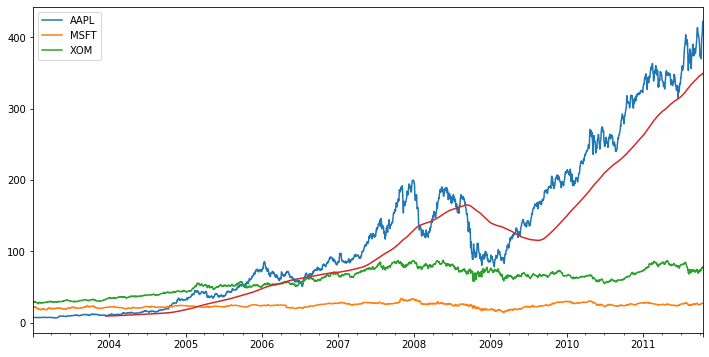

In [288]:
close_px[['AAPL', 'MSFT', 'XOM']].plot(figsize=(12,6))
close_px['AAPL'].rolling(250).mean().plot(figsize=(12,6))

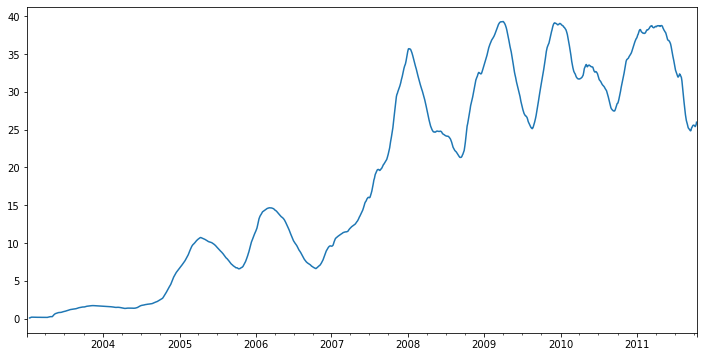

In [299]:
AAPL_std250 = close_px['AAPL'].rolling(250, min_periods=10).std()
AAPL_std250.plot(figsize=(12,6))

In [302]:
expanding_mean = AAPL_std250.expanding().mean()

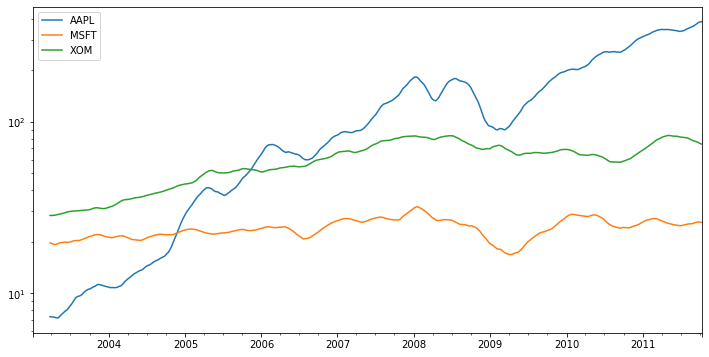

In [305]:
close_px.rolling(60).mean().plot(figsize=(12,6), logy=True)

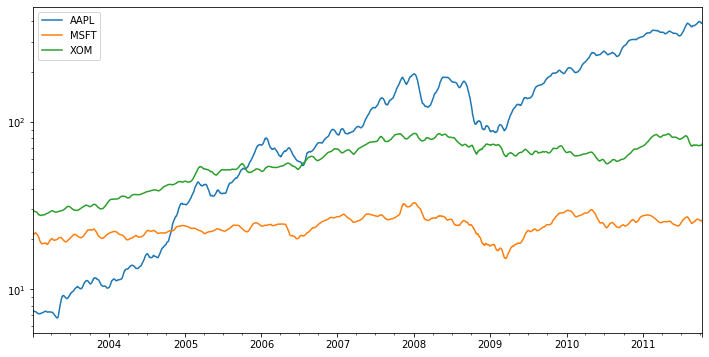

In [307]:
close_px.rolling('20D').mean().plot(figsize=(12,6), logy=True) #for 20 days

## Exponentially Weighted Functions

In [311]:
aapl_px = close_px['AAPL']['2006':'2007']

In [313]:
ma60 = aapl_px.rolling(30, min_periods=20).mean()

In [314]:
ewm60 = aapl_px.ewm(span=30).mean()

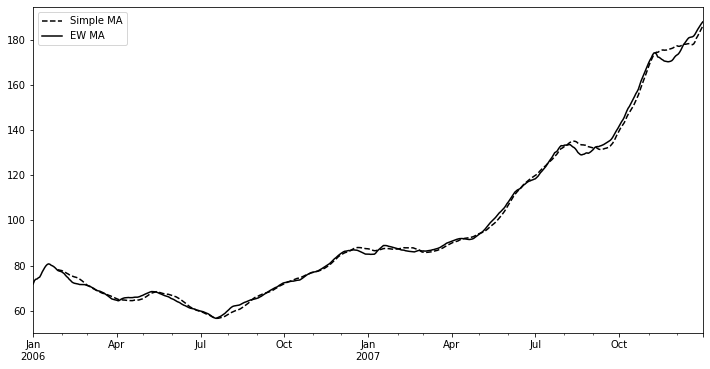

In [315]:
ma60.plot(figsize=(12,6), style='k--', label='Simple MA')
ewm60.plot(figsize=(12,6), style='k-', label='EW MA')
plt.legend()

## Binary Moving Window Functions

In [318]:
spx_px = close_all['SPX']

In [321]:
spx_returns = spx_px.pct_change()

In [322]:
returns = close_all.pct_change()

In [323]:
corr = returns['AAPL'].rolling(125, min_periods=100).corr(spx_returns)

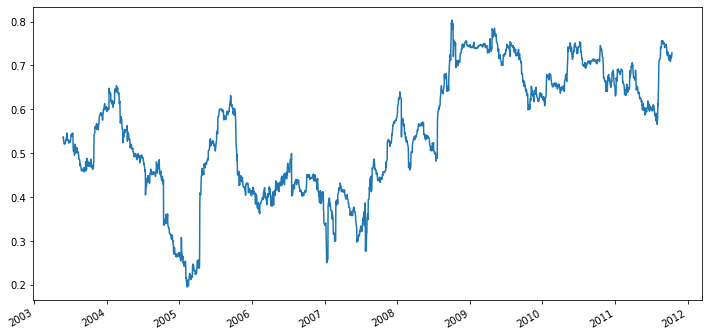

In [324]:
corr.plot(figsize=(12,6))

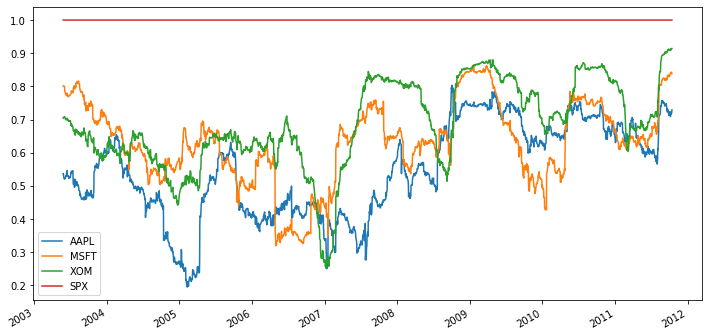

In [326]:
corr = returns.rolling(125, min_periods=100).corr(spx_returns)
corr.plot(figsize=(12,6))

## User-Defined Moving Window Functions

In [327]:
from scipy.stats import percentileofscore

In [329]:
score_at_2 = lambda x: percentileofscore(x, 0.02)

In [331]:
result = returns['AAPL'].rolling(250).apply(score_at_2)

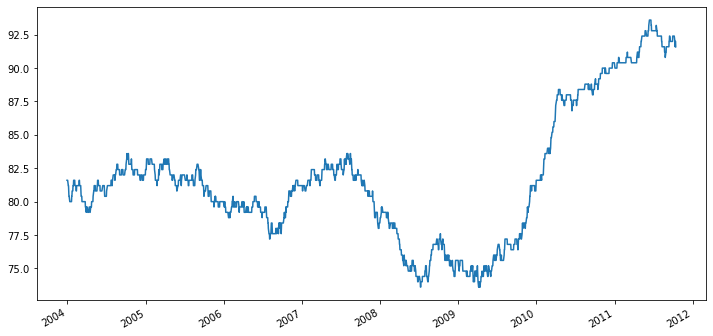

In [332]:
result.plot(figsize=(12,6))